In [5]:
import pandas as pd
df = pd.read_csv('/Users/souadmouajel/Desktop/Ironhack/lab-sessions/week-7/loan-approval-prediction/data/clean/cleaned_loan_data.csv')
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,graduate,no,9600000,29900000,12,778,2400000,17600000,22700000,8000000,approved
1,2,0,not-graduate,yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,rejected
2,3,3,graduate,no,9100000,29700000,20,506,7100000,4500000,33300000,12800000,rejected
3,4,3,graduate,no,8200000,30700000,8,467,18200000,3300000,23300000,7900000,rejected
4,5,5,not-graduate,yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,rejected


In [13]:
# Define the numerical columns in order to prepare them for outliers detiction
num_cols = df.select_dtypes(include='number').columns.tolist()
# Then remove 'loan_id' from that list, if it exists
if 'loan_id' in num_cols:
    num_cols.remove('loan_id')

print(num_cols)

['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']


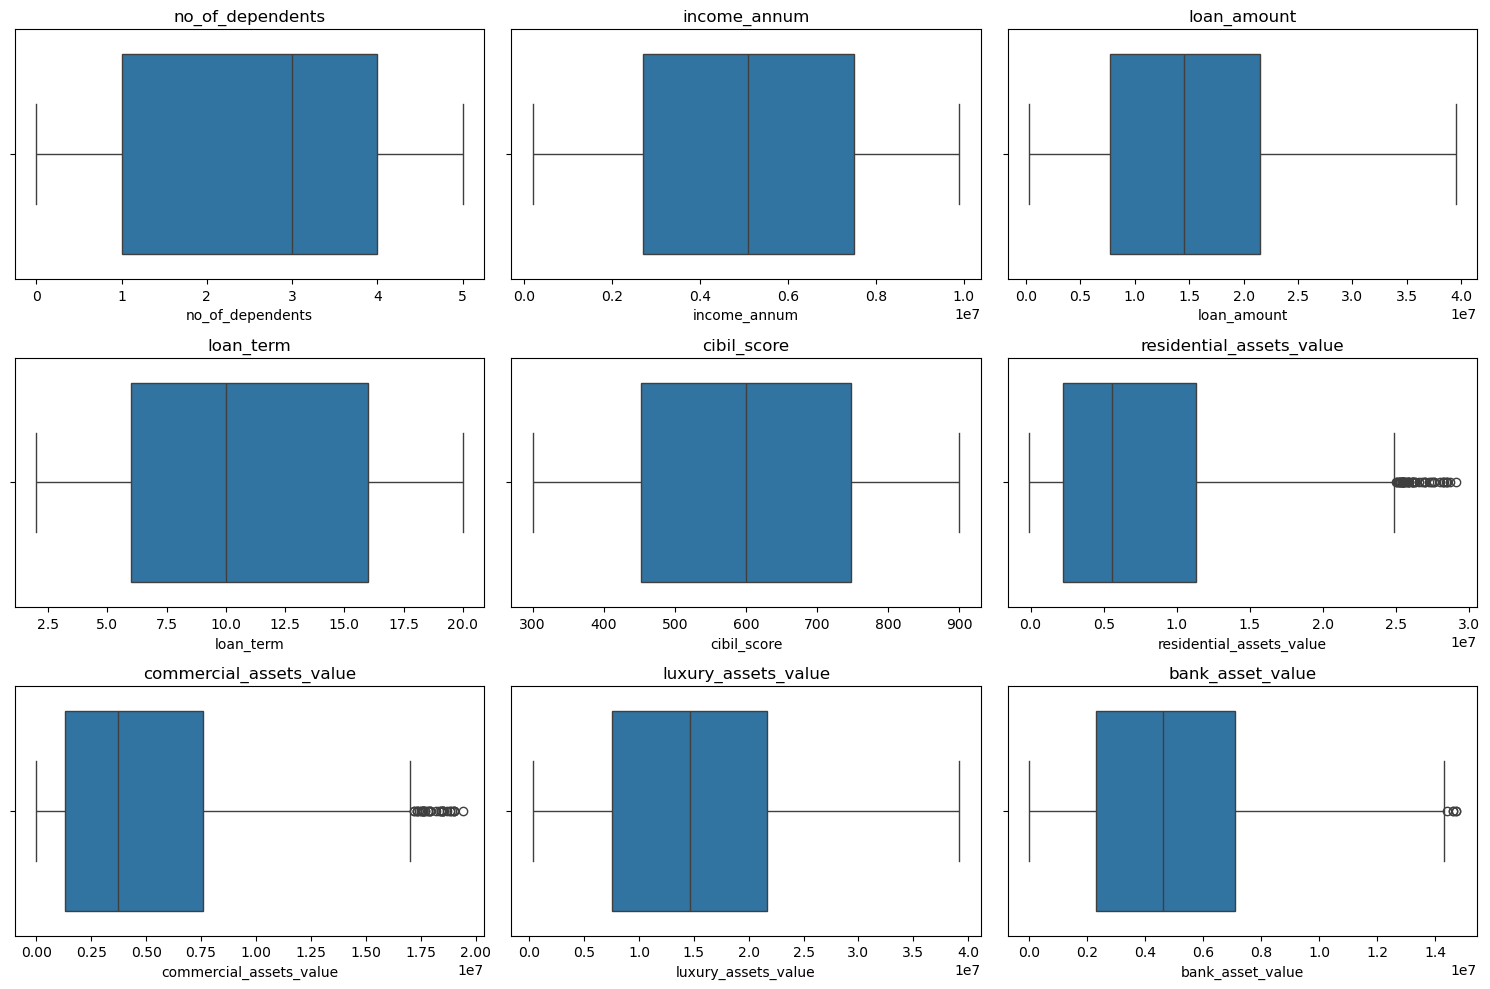

In [15]:
# Outliers detiction 
import matplotlib.pyplot as plt
import seaborn as sns

# Set up boxplots for all numerical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot((len(num_cols) + 2) // 3, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.tight_layout()
plt.show()



In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [19]:
df.loan_amount.describe()

count    4.269000e+03
mean     1.513345e+07
std      9.043363e+06
min      3.000000e+05
25%      7.700000e+06
50%      1.450000e+07
75%      2.150000e+07
max      3.950000e+07
Name: loan_amount, dtype: float64

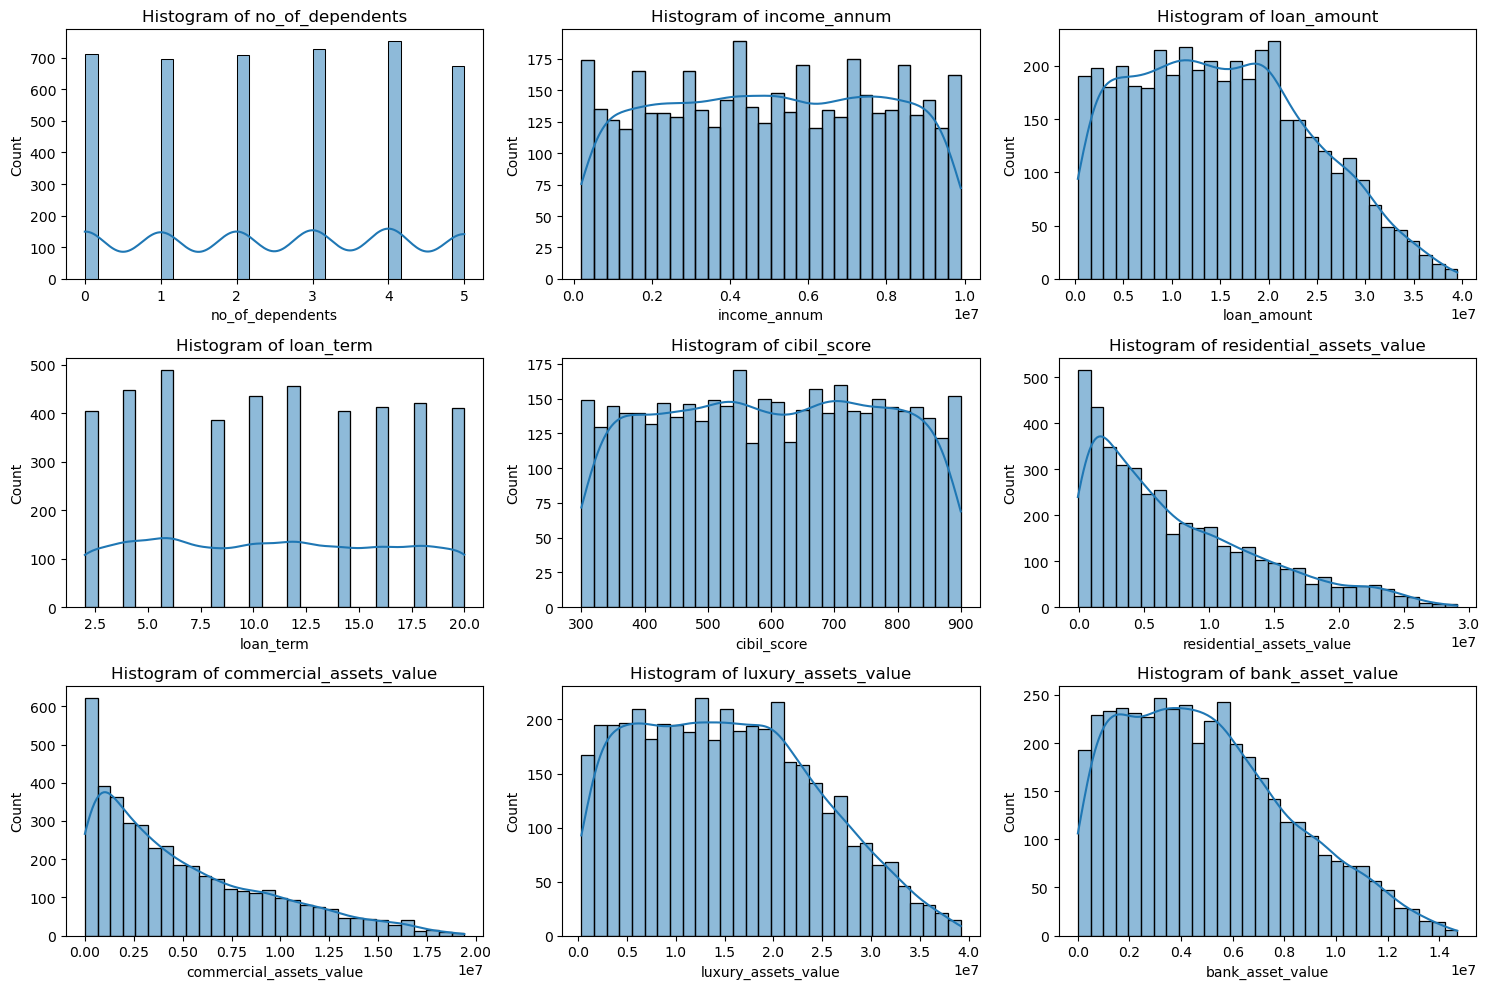

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = df.select_dtypes(include='number').columns.tolist()
# Then remove 'loan_id' from that list, if it exists
if 'loan_id' in num_cols:
    num_cols.remove('loan_id')

plt.figure(figsize=(15, 10))

for i, col in enumerate(num_cols):
    plt.subplot((len(num_cols) + 2) // 3, 3, i + 1)  # arrange plots in rows of 3
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Histogram of {col}')
    plt.tight_layout()

plt.show()


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [ ]:
import seaborn as sns
sns.scatterplot(x='income_annum', y='loan_amount', data=df)


<Axes: xlabel='None', ylabel='loan_amount'>

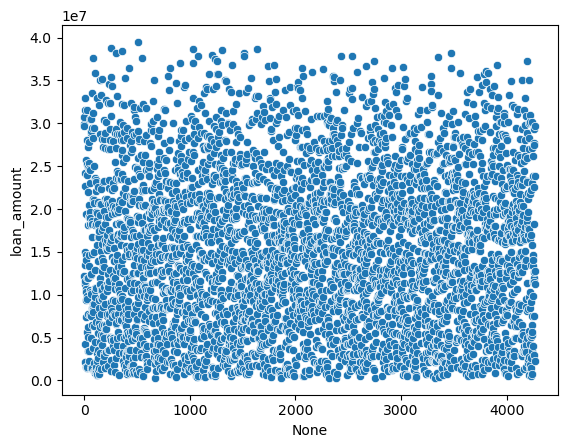

In [29]:
sns.scatterplot(x=df.index, y='loan_amount', data=df)

In [ ]:
sns.histplot(df['cibil_score'], bins=30, kde=True)


In [31]:
df.loan_id.head(50)

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12    13
13    14
14    15
15    16
16    17
17    18
18    19
19    20
20    21
21    22
22    23
23    24
24    25
25    26
26    27
27    28
28    29
29    30
30    31
31    32
32    33
33    34
34    35
35    36
36    37
37    38
38    39
39    40
40    41
41    42
42    43
43    44
44    45
45    46
46    47
47    48
48    49
49    50
Name: loan_id, dtype: int64